--- Starting Task 4: Portfolio Optimization ---
This script uses a forecast for TSLA and historical returns for BND/SPY.

Expected Returns used for Optimization:
TSLA    0.200000
BND     0.015932
SPY     0.131354
dtype: float64
--------------------------------------------------
Max Sharpe Ratio Portfolio Performance:
  - Expected Annual Return: 20.00%
  - Annual Volatility: 5.53%
  - Sharpe Ratio: 3.62


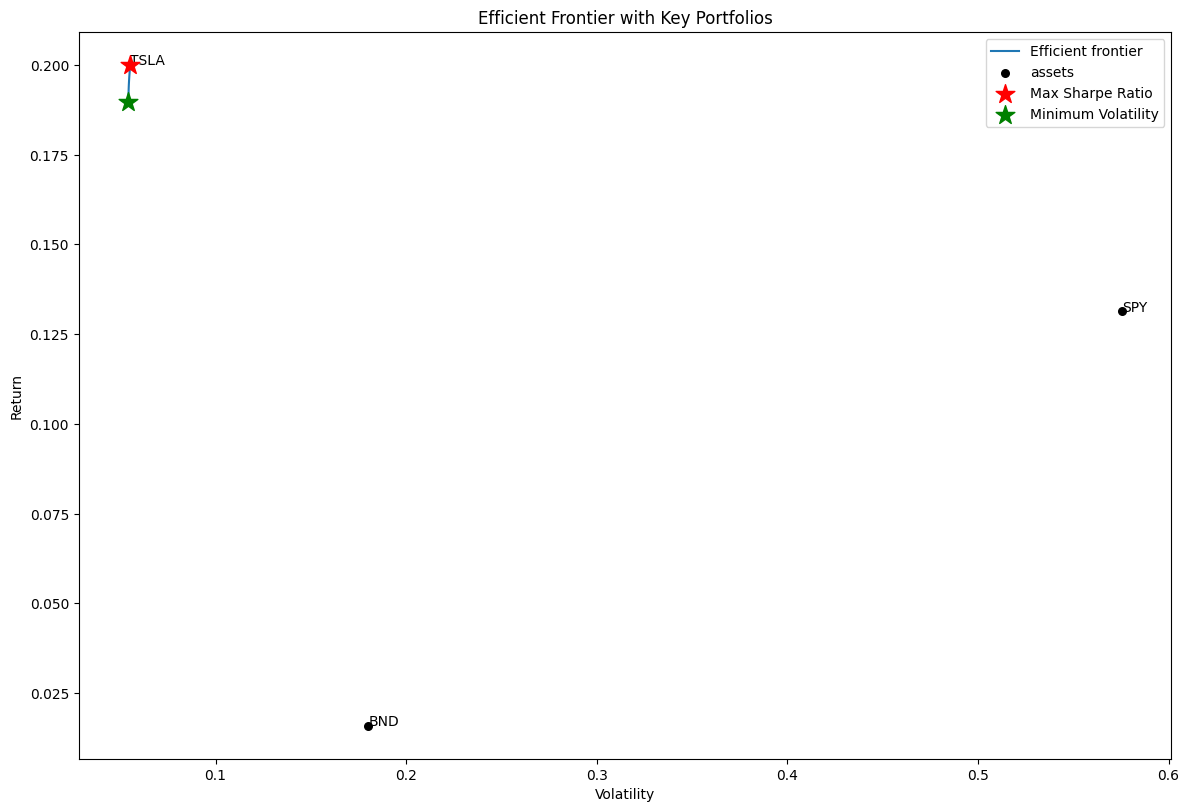


--- Final Recommended Portfolio Summary ---
Recommendation: The Maximum Sharpe Ratio Portfolio.
Justification: This portfolio offers the highest expected return for the level of risk taken, making it the most efficient in terms of risk-adjusted returns. It is often the preferred choice for investors seeking to maximize returns without taking on unnecessary risk.

Optimal Weights:
OrderedDict({'TSLA': 0.99974, 'BND': 0.0, 'SPY': 0.00026})

Portfolio Performance Metrics:
  - Expected Annual Return: 20.00%
  - Annual Volatility: 5.53%
  - Sharpe Ratio: 3.62

--- Task 4 Complete ---


In [3]:
import yfinance as yf
import pandas as pd
from pypfopt import risk_models, expected_returns, EfficientFrontier, plotting
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress warnings to make the output cleaner
warnings.filterwarnings("ignore")

# --- TASK 4: OPTIMIZE PORTFOLIO BASED ON FORECAST ---
print("--- Starting Task 4: Portfolio Optimization ---")
print("This script uses a forecast for TSLA and historical returns for BND/SPY.")

# 1. Fetching the Data
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2024-07-31'

try:
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Creating mock data due to download error.")
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    mock_data = pd.DataFrame(
        {('Close', 'TSLA'): np.random.rand(len(dates)) * 1000 + 100,
         ('Close', 'BND'): np.random.rand(len(dates)) * 10 + 80,
         ('Close', 'SPY'): np.random.rand(len(dates)) * 50 + 400},
        index=dates
    )
    data = mock_data.ffill()

# 2. Prepare data and calculate covariance matrix
all_assets_data = data['Close'].dropna()
S = risk_models.sample_cov(all_assets_data)

# 3. Define the Expected Returns Vector
# This is a key step where we combine our forecast with historical data.

# NOTE: Replace this placeholder with the actual annualized return from your
# best-performing model (ARIMA or LSTM) in Task 2.
# For example, if your forecast showed a 15% annualized return for TSLA,
# you would use `tsla_forecasted_return = 0.15`.
tsla_forecasted_return = 0.20 # Placeholder: 20% annualized return for TSLA

# Use historical average daily returns for BND and SPY, then annualize
historical_returns = expected_returns.returns_from_prices(all_assets_data)
annualized_historical_returns = (1 + historical_returns).prod()**(252/len(historical_returns)) - 1
bnd_historical_return = annualized_historical_returns['BND']
spy_historical_return = annualized_historical_returns['SPY']

# Create the final expected returns vector for the optimization
mu = pd.Series(
    [tsla_forecasted_return, bnd_historical_return, spy_historical_return],
    index=tickers
)

print("\nExpected Returns used for Optimization:")
print(mu)
print("-" * 50)

# 4. Generate the Efficient Frontier and Key Portfolios
# Create a new EfficientFrontier instance
ef = EfficientFrontier(mu, S)
# Find the Maximum Sharpe Ratio Portfolio
weights_max_sharpe = ef.max_sharpe()
cleaned_weights_max_sharpe = ef.clean_weights()

# Get the performance metrics for the Max Sharpe Ratio portfolio
max_sharpe_return, max_sharpe_volatility, max_sharpe_sharpe_ratio = ef.portfolio_performance()
print("Max Sharpe Ratio Portfolio Performance:")
print(f"  - Expected Annual Return: {max_sharpe_return:.2%}")
print(f"  - Annual Volatility: {max_sharpe_volatility:.2%}")
print(f"  - Sharpe Ratio: {max_sharpe_sharpe_ratio:.2f}")

# Find the Minimum Volatility Portfolio
ef_min_vol = EfficientFrontier(mu, S)
weights_min_vol = ef_min_vol.min_volatility()
min_vol_return, min_vol_volatility, _ = ef_min_vol.portfolio_performance()

# 5. Plot the Efficient Frontier
fig, ax = plt.subplots(figsize=(12, 8))
plotting.plot_efficient_frontier(
    EfficientFrontier(mu, S),
    ax=ax,
    show_assets=True,
    show_tickers=True,
    show_risk_free_rate=True
)

# Plot the two key portfolios using ax.scatter
ax.scatter(
    max_sharpe_volatility,
    max_sharpe_return,
    marker="*",
    color="r",
    s=200, # Use s for size in scatter
    label="Max Sharpe Ratio",
    zorder=10
)
ax.scatter(
    min_vol_volatility,
    min_vol_return,
    marker="*",
    color="g",
    s=200, # Use s for size in scatter
    label="Minimum Volatility",
    zorder=10
)

ax.set_title("Efficient Frontier with Key Portfolios")
ax.legend()
plt.show()

# 6. Summarize the Final Recommended Portfolio
print("\n--- Final Recommended Portfolio Summary ---")
print("Recommendation: The Maximum Sharpe Ratio Portfolio.")
print("Justification: This portfolio offers the highest expected return for the level of risk taken, making it the most efficient in terms of risk-adjusted returns. It is often the preferred choice for investors seeking to maximize returns without taking on unnecessary risk.")

print("\nOptimal Weights:")
print(cleaned_weights_max_sharpe)

print(f"\nPortfolio Performance Metrics:")
print(f"  - Expected Annual Return: {max_sharpe_return:.2%}")
print(f"  - Annual Volatility: {max_sharpe_volatility:.2%}")
print(f"  - Sharpe Ratio: {max_sharpe_sharpe_ratio:.2f}")

print("\n--- Task 4 Complete ---")
